In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Credit & Collection Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,trainer_name,training_price,discount_training,satisfaction_level,training_session,number_of_participant,training_field,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,Ibun,4800000.0,60,5,17,20,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Manajemen Resiko APU & PPT bagi Staff Perbanka...,Mengelola NPL dengan Early Warning System (EWS)
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,Reza,5500000.0,50,5,16,19,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Manajemen Resiko APU & PPT bagi Staff Perbanka...,Manajemen Resiko APU & PPT bagi Staff Perbanka...
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,Ibun,4800000.0,60,5,17,18,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Manajemen Resiko APU & PPT bagi Staff Perbanka...,Mengelola NPL dengan Early Warning System (EWS)
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,Reza,5500000.0,50,5,16,18,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Manajemen Resiko APU & PPT bagi Staff Perbanka...,Mengelola NPL dengan Early Warning System (EWS)
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,Haris,6000000.0,50,5,17,18,Credit & Collection Series,Mengelola NPL dengan Early Warning System (EWS),Manajemen Resiko APU & PPT bagi Staff Perbanka...,Mengelola NPL dengan Early Warning System (EWS)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   5000 non-null   int64  
 1   company_ID                                   5000 non-null   object 
 2   company_name                                 5000 non-null   object 
 3   company_pic                                  5000 non-null   object 
 4   company_address                              5000 non-null   object 
 5   company_phone                                5000 non-null   object 
 6   company_email                                5000 non-null   object 
 7   company_field                                5000 non-null   object 
 8   transaction_date                             5000 non-null   object 
 9   level_training_process                       5000 non-null   int64  
 10  

In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop("cross_selling", axis=1, inplace=True)

In [5]:
X = df.drop("upselling", axis=1)
y = df["upselling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = joblib.load("./pipeline_save/pipeline2.joblib")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


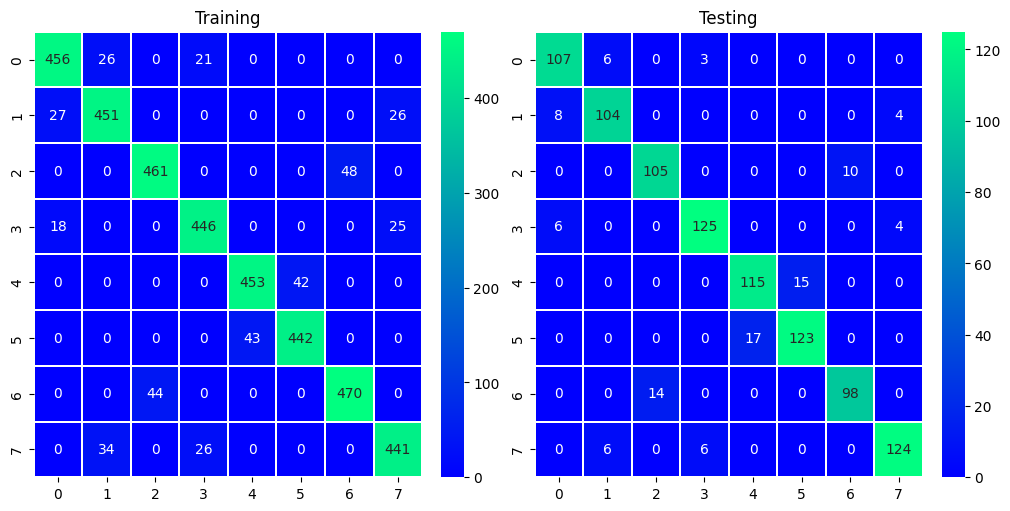

In [6]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()


In [7]:
print(classification_report(y_test, y_pred))

                                                                                       precision    recall  f1-score   support

                                                   Debt Collection Strategy & Tactics       0.88      0.92      0.90       116
                                   Graphology & Powerful Interview for Credit Analyst       0.90      0.90      0.90       116
       How to detect & prevent application fraud in Digital Era for Banking & Fintech       0.88      0.91      0.90       115
                                                        Managing Corporate Collection       0.93      0.93      0.93       135
Manajemen Resiko APU & PPT bagi Staff Perbankan, Multifinance, sekuritas dan asuransi       0.87      0.88      0.88       130
                                      Mengelola NPL dengan Early Warning System (EWS)       0.89      0.88      0.88       140
                                               Restrukturisasi Kredit for SME Lending       0.91      0.88    

In [8]:
a = model.predict_proba(X_test.iloc[-1:, :])
b = ["Debt Collection Strategy & Tactics", "Graphology & Powerful Interview for Credit Analyst",
     "How to detect & prevent application fraud in Digital Era for Banking & Fintech", "Managing Corporate Collection",
     "Manajemen Resiko APU & PPT bagi Staff Perbankan, Multifinance, sekuritas dan asuransi",
     "Mengelola NPL dengan Early Warning System (EWS)", "Restrukturisasi Kredit for SME Lending", "Teknik Penyelesaian Kredit & Pemasaran AYDA yang Efektif"]

for i, j in zip(b, a.ravel()):
    print(i, f"{j*100:.2f}%")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Debt Collection Strategy & Tactics 1.00%
Graphology & Powerful Interview for Credit Analyst 1.00%
How to detect & prevent application fraud in Digital Era for Banking & Fintech 81.10%
Managing Corporate Collection 0.97%
Manajemen Resiko APU & PPT bagi Staff Perbankan, Multifinance, sekuritas dan asuransi 0.98%
Mengelola NPL dengan Early Warning System (EWS) 0.96%
Restrukturisasi Kredit for SME Lending 13.00%
Teknik Penyelesaian Kredit & Pemasaran AYDA yang Efektif 0.99%


In [9]:
model.predict(X_test.iloc[-1:, :])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


array(['How to detect & prevent application fraud in Digital Era for Banking & Fintech'],
      dtype=object)

In [10]:
y_test.iloc[-1]

'How to detect & prevent application fraud in Digital Era for Banking & Fintech'

In [20]:
a = X_test.iloc[:1]
a.to_dict()

{'Unnamed: 0': {1501: 1501},
 'company_ID': {1501: 'P1502'},
 'company_name': {1501: 'UD Napitupulu (Persero) Tbk'},
 'company_pic': {1501: 'Kadir Sitompul'},
 'company_address': {1501: 'Gg. Otto Iskandardinata No. 14\nSalatiga, DKI Jakarta 05878'},
 'company_phone': {1501: '+62 (0993) 413-3583'},
 'company_email': {1501: 'purwantitugiman@example.org'},
 'company_field': {1501: 'Aktivitas Kesehatan Manusia Dan Aktivitas Sosial'},
 'transaction_date': {1501: '2024-02-10'},
 'level_training_process': {1501: 4},
 'purchasing_time_patterns': {1501: 'diskon'},
 'number_of_participants': {1501: 14},
 'group': {1501: 'Group'},
 'total_payment': {1501: 84000000.0},
 'satisfaction': {1501: 4},
 'communication_channel': {1501: 'social media'},
 'complaints': {1501: 'positif'},
 'communication_quality': {1501: 'sedang'},
 'possibility_of_purchasing_the_same_training': {1501: 64},
 'frequency_engagement': {1501: 8},
 'brand_sustainability': {1501: 3},
 'rating_training': {1501: 5},
 'tren_mode_fac